In [34]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

In [35]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [36]:
# encode
dataset["smoker"] = dataset["smoker"].map({"yes": 1, "no": 0})
dataset["sex"] = dataset["sex"].map({"male": 1, "female": 0})
dataset["region"] = dataset["region"].map({
    "northeast": 0,
    "northwest": 1,
    "southeast": 2,
    "southwest": 3
})
dataset = pd.get_dummies(dataset, columns=["region"], prefix='r', prefix_sep='_')

# split and scale
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset2 = dataset.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset2.copy()
train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

model = keras.Sequential([
    normalizer,
    layers.Dense(9, activation='relu'),
    layers.Dense(9, activation='relu'),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(3, activation='relu'),
    layers.Dense(1)
])

model.compile(
    loss = 'mean_absolute_error',
    optimizer = tf.keras.optimizers.Adam(0.05),
    metrics = ['MeanAbsoluteError', 'MeanSquaredError']
)

history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100
)

model.evaluate(test_features, test_labels)

9/9 [==============================] - 0s 4ms/step - loss: 2673.1321 - mean_absolute_error: 2673.1321 - mean_squared_error: 35163348.0000


[2673.132080078125, 2673.132080078125, 35163348.0]

In [37]:
test_dataset = test_features

9/9 - 0s - loss: 2673.1321 - mean_absolute_error: 2673.1321 - mean_squared_error: 35163348.0000 - 73ms/epoch - 8ms/step
Testing set Mean Abs Error: 2673.13 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


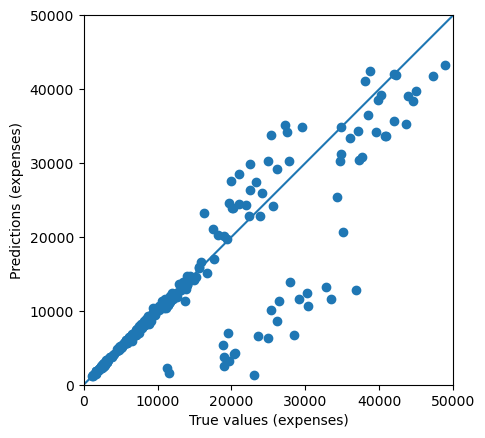

In [38]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
